In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
domain_min, domain_max = 0, torch.pi

def init_net(layer=[1] + [10] + [1]):
    modules = []
    for i in range(len(layer)-2):
        modules.append(nn.Linear(layer[i], layer[i+1]))
        modules.append(nn.Tanh())
    
    modules.append(nn.Linear(layer[-2], layer[-1], bias=False)) 
    
    net = nn.Sequential(*modules)
    
    return net

In [3]:
model_path = Path('model_torch_pinns_1d/equidistant.model')

net = init_net()
net.load_state_dict(torch.load(model_path))

<All keys matched successfully>

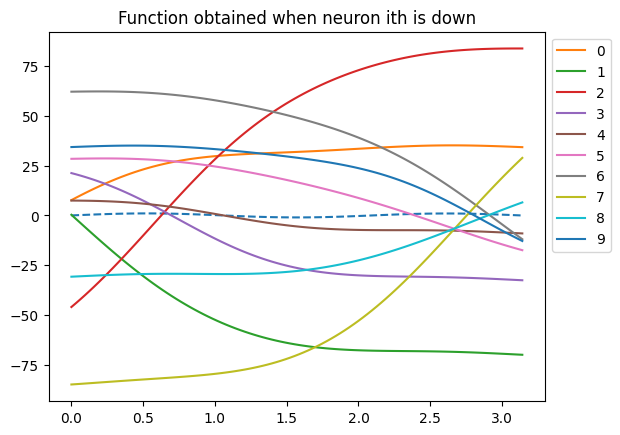

In [4]:
x = torch.linspace(domain_min, domain_max, 100)

net_out = net(x.unsqueeze(dim=1)).squeeze().detach()
plt.plot(x, net_out, '--')

for i in range(10):
    W_1 = net[-1].weight.clone().detach()
    W_1[0, i] = 0
    net_out_1 = net[1](net[0](x.unsqueeze(dim=1))).detach() @ W_1.T

    plt.plot(x, net_out_1, label=f'{i}')

plt.legend(bbox_to_anchor=(1,1))
plt.title('Function obtained when neuron ith is down')
plt.show()

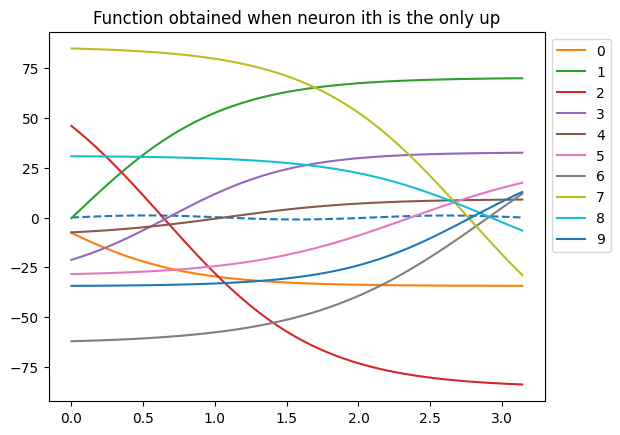

In [6]:
x = torch.linspace(domain_min, domain_max, 100)

net_out = net(x.unsqueeze(dim=1)).squeeze().detach()
plt.plot(x, net_out, '--')

for i in range(10):
    W_1 = torch.zeros_like(net[-1].weight)
    W_1[0, i] = net[-1].weight.clone().detach()[0, i]
    net_out_1 = net[1](net[0](x.unsqueeze(dim=1))).detach() @ W_1.T

    plt.plot(x, net_out_1, label=f'{i}')

plt.legend(bbox_to_anchor=(1,1))
plt.title('Function obtained when neuron ith is the only up')
plt.show()